## Misión 1

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import geopandas as gpd

areas_urbanas = gpd.read_file("data/Areas Urbanas/areas_urbanas.shp")
distritos_censales = gpd.read_file("data/Distritos Censales/Distritos Censales RM.shp")


In [3]:
areas_urbanas.head(4)

,NOMBRE,TIPO_AREA,SHAPE_Leng,SHAPE_Area,geometry
0,Chiguayante,Ciudad,29855.998337,1.038076e+07,"POLYGON ((140044.634 5911024.284, 140051.361 5..."
1,Lota,Ciudad,14233.349738,5.262642e+06,"POLYGON ((131359.666 5889462.902, 131475.343 5..."
2,Coronel,Ciudad,41577.791832,1.551685e+07,"POLYGON ((127278.440 5896965.436, 127411.675 5..."
3,San Rosendo,Ciudad,6499.369423,1.534402e+06,"POLYGON ((168583.830 5870293.970, 168725.579 5..."


In [4]:
distritos_censales.head(4)

,NOM_REG,COD_PROV,NOM_PROV,COD_COM,NOM_COM,NOM_DIS,CODIGO,E,D,C3,C2,ABC1,ADIMARK_T,Area,Densidad,1_UF_M2,geometry
0,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Huelén,1310101.0,28.0,397.0,1232.0,1390.0,365.0,3412.0,704315.75,48.44,31.09,"POLYGON ((346775.511 6299463.724, 346788.392 6..."
1,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Moneda,1310102.0,51.0,560.0,999.0,903.0,228.0,2741.0,1166659.89,23.49,21.10,"POLYGON ((345880.280 6299633.958, 345961.610 6..."
2,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Amunátegui,1310103.0,38.0,389.0,956.0,891.0,113.0,2387.0,509080.85,46.89,12.00,"POLYGON ((345546.017 6299748.840, 345650.511 6..."
3,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Brasil,1310104.0,52.0,657.0,1728.0,2202.0,423.0,5062.0,761738.52,66.45,10.25,"POLYGON ((344856.320 6298892.632, 345672.277 6..."


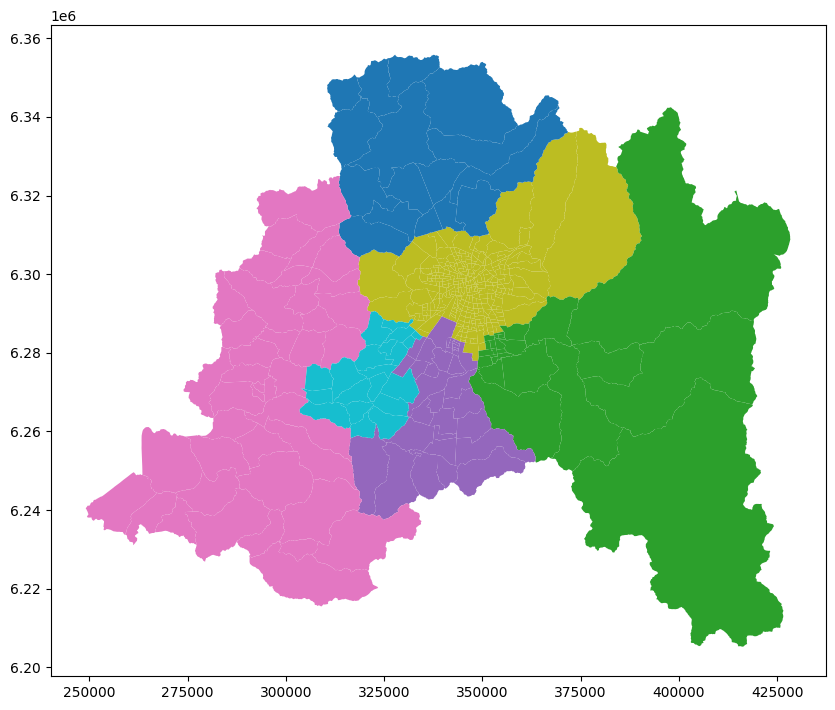

In [5]:
distritos_censales.plot(column = 'NOM_PROV', figsize = (10,10));

#### Nos piden del area urbana de la región.

In [6]:
santiago_urbano = areas_urbanas[areas_urbanas['NOMBRE'] == 'Santiago']
santiago_urbano.head(10)

,NOMBRE,TIPO_AREA,SHAPE_Leng,SHAPE_Area,geometry
385,Santiago,Ciudad,427491.444262,5.821041e+08,"MULTIPOLYGON (((338445.291 6306151.222, 338289..."


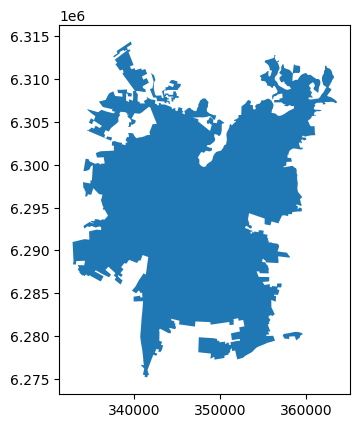

In [7]:
santiago_urbano.plot();

In [8]:
total_distritos = len(distritos_censales)
distritos_por_area = distritos_censales.groupby('NOM_PROV').size()
porcentaje_por_area = distritos_censales['NOM_PROV'].map(distritos_por_area / total_distritos * 100)
distritos_censales['porcentaje_distritos_provincia'] = porcentaje_por_area

distritos_censales[['NOM_PROV', 'porcentaje_distritos_provincia']].groupby('NOM_PROV').head()

,NOM_PROV,porcentaje_distritos_provincia
0,Santiago,69.487751
1,Santiago,69.487751
2,Santiago,69.487751
3,Santiago,69.487751
4,Santiago,69.487751
312,Cordillera,5.790646
313,Cordillera,5.790646
314,Cordillera,5.790646
315,Cordillera,5.790646
316,Cordillera,5.790646


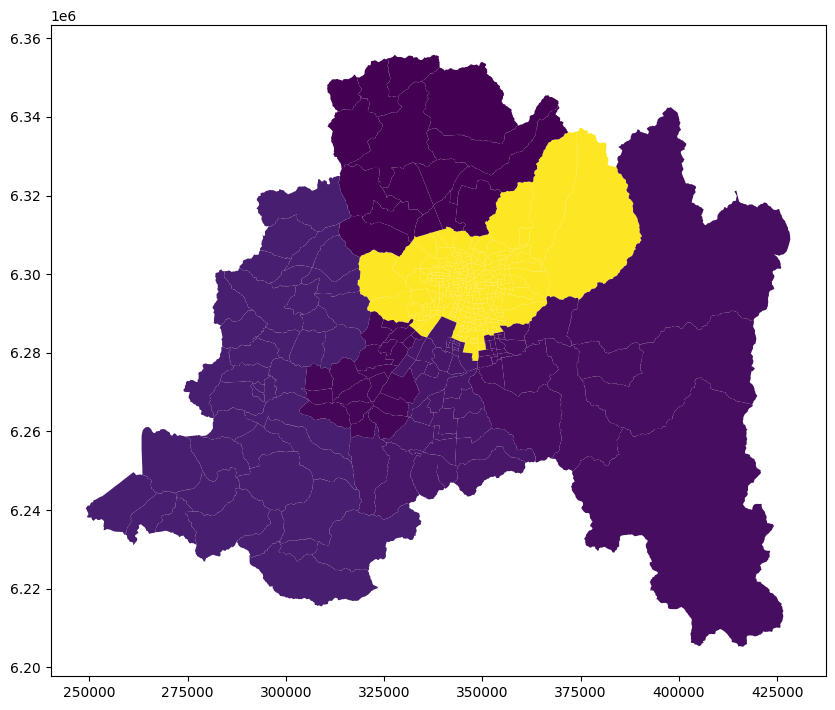

In [9]:
distritos_censales.plot(column = 'porcentaje_distritos_provincia', figsize = (10,10));

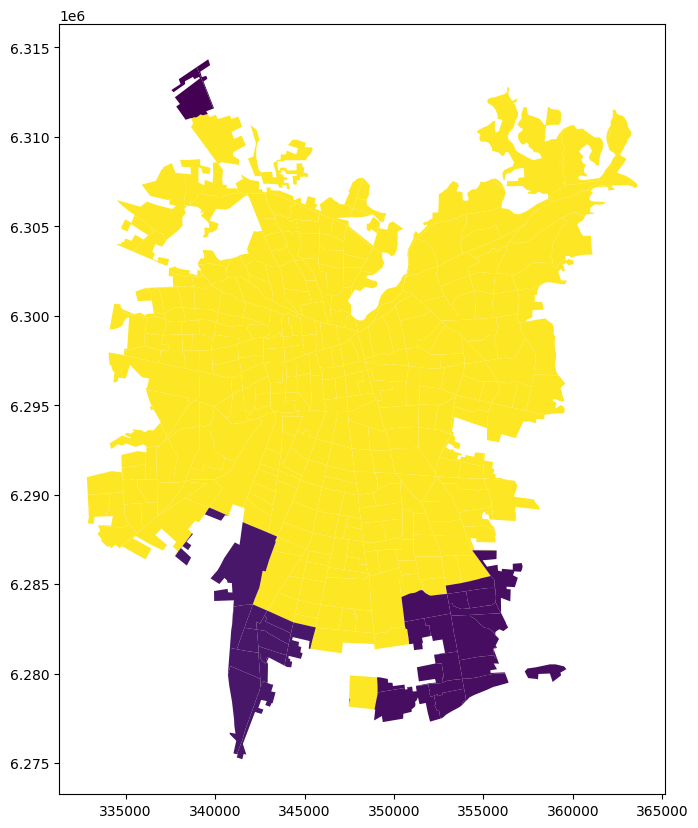

In [10]:
distritos_urbano = gpd.overlay(distritos_censales, santiago_urbano, how='intersection')
distritos_urbano.plot(column = 'porcentaje_distritos_provincia', figsize = (10,10));

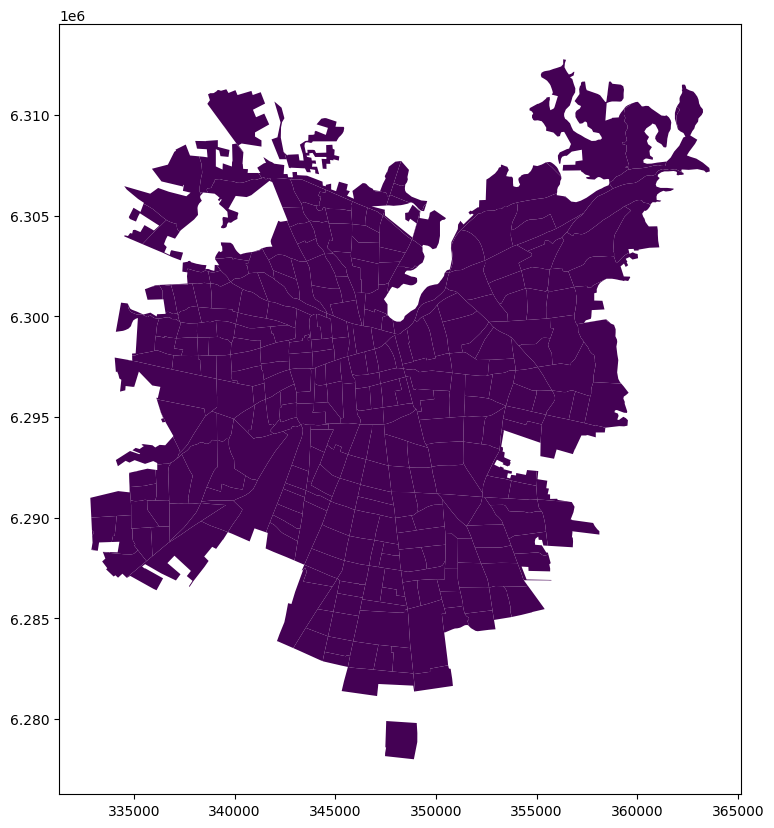

In [11]:
# Filtramos los distritos urbanos con mayor porcentaje de distritos por provincia
max_porcentaje = distritos_urbano['porcentaje_distritos_provincia'].max()
distritos_urbanos = distritos_urbano[distritos_urbano['porcentaje_distritos_provincia'] == max_porcentaje]

# Graficamos con plot solo los distritos urbanos con mayor porcentaje, y que sean urbanos dentro de RM 
distritos_urbanos.plot(column='porcentaje_distritos_provincia', figsize=(10,10));

In [12]:
def nivel_socioeconomico(row):
    total = row['ADIMARK_T']
    if total == 0:
        return 'Sin Clasificación'
    porcentaje_E_D = (row['E'] + row['D']) / total
    porcentaje_C3_C2 = (row['C3'] + row['C2']) / total
    porcentaje_ABC1 = row['ABC1'] / total
    
    if porcentaje_E_D >= 0.6:
        return 'Bajo'
    elif porcentaje_C3_C2 >= 0.5:
        return 'Medio'
    elif porcentaje_C3_C2 >= 0.4 and porcentaje_E_D >= 0.3:
        return 'Medio'

    elif porcentaje_C3_C2 >= 0.35 and porcentaje_E_D >= 0.2:
        return 'Medio'

    elif porcentaje_ABC1 >= 0.5:
        return 'Alto'
    elif porcentaje_ABC1 >= 0.4 and porcentaje_E_D < 0.2:
        return 'Alto'   
    elif porcentaje_ABC1 >= 0.4 and porcentaje_C3_C2 >= 0.5 and porcentaje_E_D >= 0.1:
        return 'Medio'
    else:
        return 'Sin Clasificación'

distritos_urbanos['nivel_socioeconomico'] = distritos_urbanos.apply(nivel_socioeconomico, axis=1)
distritos_urbanos.head(10)

,NOM_REG,COD_PROV,NOM_PROV,COD_COM,NOM_COM,NOM_DIS,CODIGO,E,D,C3,...,Area,Densidad,1_UF_M2,porcentaje_distritos_provincia,NOMBRE,TIPO_AREA,SHAPE_Leng,SHAPE_Area,geometry,nivel_socioeconomico
0,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Huelén,1310101.0,28.0,397.0,1232.0,...,704315.75,48.44,31.09,69.487751,Santiago,Ciudad,427491.444262,5.821041e+08,"POLYGON ((346788.392 6299461.792, 346943.942 6...",Medio
1,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Moneda,1310102.0,51.0,560.0,999.0,...,1166659.89,23.49,21.10,69.487751,Santiago,Ciudad,427491.444262,5.821041e+08,"POLYGON ((345961.610 6299612.269, 346298.704 6...",Medio
2,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Amunátegui,1310103.0,38.0,389.0,956.0,...,509080.85,46.89,12.00,69.487751,Santiago,Ciudad,427491.444262,5.821041e+08,"POLYGON ((345650.511 6299703.570, 345809.442 6...",Medio
3,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Brasil,1310104.0,52.0,657.0,1728.0,...,761738.52,66.45,10.25,69.487751,Santiago,Ciudad,427491.444262,5.821041e+08,"POLYGON ((345672.277 6298980.643, 345689.082 6...",Medio
4,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Chacabuco,1310105.0,45.0,643.0,1092.0,...,765782.74,37.86,11.87,69.487751,Santiago,Ciudad,427491.444262,5.821041e+08,"POLYGON ((344041.982 6298246.207, 344940.918 6...",Medio
5,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Portales,1310106.0,81.0,741.0,1268.0,...,618570.13,53.95,8.91,69.487751,Santiago,Ciudad,427491.444262,5.821041e+08,"POLYGON ((344856.320 6298892.632, 344863.343 6...",Medio
6,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Matucana,1310107.0,50.0,602.0,812.0,...,556810.27,38.09,7.50,69.487751,Santiago,Ciudad,427491.444262,5.821041e+08,"POLYGON ((344120.709 6299468.258, 344268.939 6...",Medio
7,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,San Saturnino,1310108.0,97.0,810.0,1078.0,...,668277.97,45.74,6.35,69.487751,Santiago,Ciudad,427491.444262,5.821041e+08,"POLYGON ((344776.355 6299869.902, 344849.608 6...",Medio
8,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Mapocho,1310109.0,127.0,868.0,1167.0,...,817926.27,37.56,7.45,69.487751,Santiago,Ciudad,427491.444262,5.821041e+08,"POLYGON ((344916.682 6300014.119, 345131.448 6...",Medio
9,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Vicuña Mackenna,1310110.0,28.0,394.0,1225.0,...,592695.23,63.52,18.44,69.487751,Santiago,Ciudad,427491.444262,5.821041e+08,"POLYGON ((347569.109 6298743.142, 347699.976 6...",Medio


In [13]:
distritos_urbanos['nivel_socioeconomico'].value_counts()

nivel_socioeconomico
Medio    266
Bajo      36
Alto       6
Name: count, dtype: int64

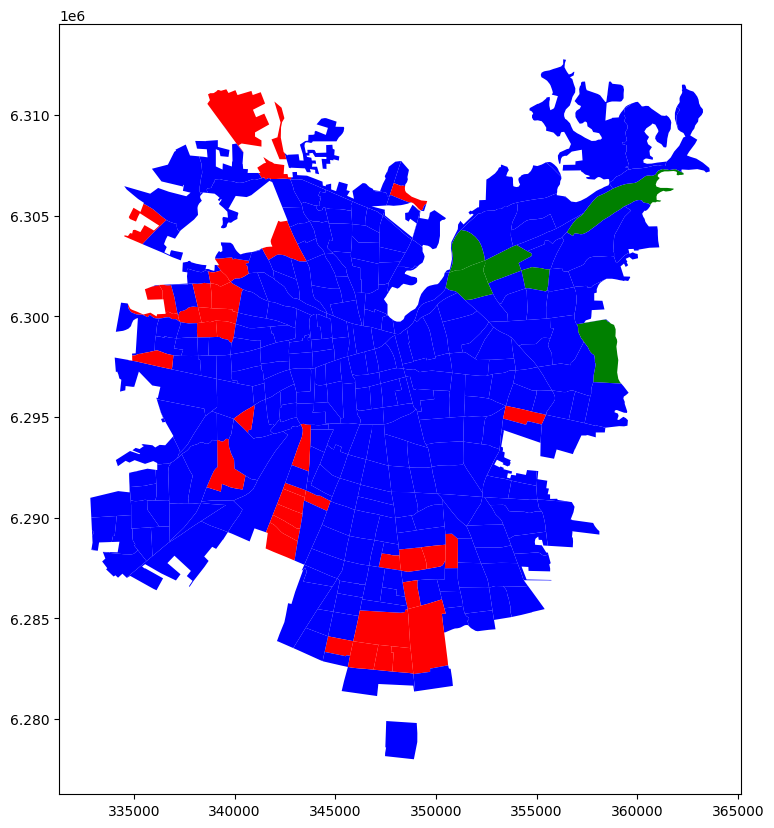

In [14]:
# Cada nivel socioeconómico tiene un color asignado: rojo, celeste y verde claro.

colors = {
    'Bajo': 'red',
    'Medio': 'blue',
    'Alto': 'green',
    'Sin Clasificación': 'lightgrey'
}

# ademas de diferenciarlos por los colores del nivel socioeconomico, tambien deben ser solo consideradas las provincias segun 
# si poseen una cantidad significativa de distritos.

distritos_urbanos['color'] = distritos_urbanos['nivel_socioeconomico'].map(colors)
distritos_urbanos.plot(color=distritos_urbanos['color'], figsize=(10,10));

# Misión 2

In [15]:
# Cargamos las estaciones de metro
estaciones_metro = gpd.read_file('data/Metro 2020/Estaciones_2020/Estaciones_2020.shp')
estaciones_metro.head()

,OBJECTID,ID_LINEA,LINEA,ESTACION,NOMBRE,POINT_X,POINT_Y,geometry
0,2,2,L2,EL PARRON,El Parrón,345717.3664,6.289105e+06,POINT (345717.366 6289105.444)
1,3,5,L5,CUMMING,Cumming,344899.1198,6.298782e+06,POINT (344899.120 6298781.571)
2,4,5,L5,QUINTA NORMAL,Quinta Normal,343809.1081,6.298628e+06,POINT (343808.803 6298622.125)
3,5,7,L4A,SAN RAMON,San Ramón,346685.4133,6.287624e+06,POINT (347436.975 6287501.270)
4,6,7,L4A,SANTA ROSA,Santa Rosa,348282.5816,6.287378e+06,POINT (348282.582 6287378.409)


In [16]:
# Calculamos los centroides de cada distrito

distritos_con_centroide = distritos_urbanos.copy()
distritos_con_centroide['centroide'] = distritos_con_centroide.geometry.centroid
distritos_con_centroide.head()

,NOM_REG,COD_PROV,NOM_PROV,COD_COM,NOM_COM,NOM_DIS,CODIGO,E,D,C3,...,1_UF_M2,porcentaje_distritos_provincia,NOMBRE,TIPO_AREA,SHAPE_Leng,SHAPE_Area,geometry,nivel_socioeconomico,color,centroide
0,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Huelén,1310101.0,28.0,397.0,1232.0,...,31.09,69.487751,Santiago,Ciudad,427491.444262,5.821041e+08,"POLYGON ((346788.392 6299461.792, 346943.942 6...",Medio,blue,POINT (347255.676 6298958.015)
1,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Moneda,1310102.0,51.0,560.0,999.0,...,21.10,69.487751,Santiago,Ciudad,427491.444262,5.821041e+08,"POLYGON ((345961.610 6299612.269, 346298.704 6...",Medio,blue,POINT (346388.173 6298891.253)
2,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Amunátegui,1310103.0,38.0,389.0,956.0,...,12.00,69.487751,Santiago,Ciudad,427491.444262,5.821041e+08,"POLYGON ((345650.511 6299703.570, 345809.442 6...",Medio,blue,POINT (345804.699 6298808.712)
3,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Brasil,1310104.0,52.0,657.0,1728.0,...,10.25,69.487751,Santiago,Ciudad,427491.444262,5.821041e+08,"POLYGON ((345672.277 6298980.643, 345689.082 6...",Medio,blue,POINT (345288.057 6298448.534)
4,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Chacabuco,1310105.0,45.0,643.0,1092.0,...,11.87,69.487751,Santiago,Ciudad,427491.444262,5.821041e+08,"POLYGON ((344041.982 6298246.207, 344940.918 6...",Medio,blue,POINT (344391.946 6297945.192)


In [17]:
estaciones_metro.crs

<Projected CRS: EPSG:32719>
Name: WGS 84 / UTM zone 19S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 72°W and 66°W, southern hemisphere between 80°S and equator, onshore and offshore. Argentina. Bolivia. Brazil. Chile. Colombia. Peru.
- bounds: (-72.0, -80.0, -66.0, 0.0)
Coordinate Operation:
- name: UTM zone 19S
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [18]:
distritos_con_centroide.crs

<Projected CRS: EPSG:32719>
Name: WGS 84 / UTM zone 19S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 72°W and 66°W, southern hemisphere between 80°S and equator, onshore and offshore. Argentina. Bolivia. Brazil. Chile. Colombia. Peru.
- bounds: (-72.0, -80.0, -66.0, 0.0)
Coordinate Operation:
- name: UTM zone 19S
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [19]:
indices_accesibilidad = []

for index, fila in distritos_con_centroide.iterrows():
    centroide = fila['centroide']
    distrito_nombre = fila['NOM_DIS']
    
    # Contamos las estaciones accesibles
    distancias = estaciones_metro.geometry.distance(centroide)
    estaciones_accesibles = (distancias <= 1000).sum()
    indices_accesibilidad.append(estaciones_accesibles)

In [20]:
indices_accesibilidad = []

for index, fila in distritos_con_centroide.iterrows():
    centroide = fila['centroide']
    distrito_nombre = fila['NOM_DIS']
    
    # Contamos las estaciones accesibles
    distancias = estaciones_metro.geometry.distance(centroide)
    estaciones_accesibles = (distancias <= 1000).sum()
    indices_accesibilidad.append(estaciones_accesibles)

In [21]:
# Agregamos el índice al GeoDataFrame
distritos_con_centroide['indice_accesibilidad'] = indices_accesibilidad

distritos_con_centroide.head()

,NOM_REG,COD_PROV,NOM_PROV,COD_COM,NOM_COM,NOM_DIS,CODIGO,E,D,C3,...,porcentaje_distritos_provincia,NOMBRE,TIPO_AREA,SHAPE_Leng,SHAPE_Area,geometry,nivel_socioeconomico,color,centroide,indice_accesibilidad
0,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Huelén,1310101.0,28.0,397.0,1232.0,...,69.487751,Santiago,Ciudad,427491.444262,5.821041e+08,"POLYGON ((346788.392 6299461.792, 346943.942 6...",Medio,blue,POINT (347255.676 6298958.015),6
1,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Moneda,1310102.0,51.0,560.0,999.0,...,69.487751,Santiago,Ciudad,427491.444262,5.821041e+08,"POLYGON ((345961.610 6299612.269, 346298.704 6...",Medio,blue,POINT (346388.173 6298891.253),7
2,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Amunátegui,1310103.0,38.0,389.0,956.0,...,69.487751,Santiago,Ciudad,427491.444262,5.821041e+08,"POLYGON ((345650.511 6299703.570, 345809.442 6...",Medio,blue,POINT (345804.699 6298808.712),7
3,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Brasil,1310104.0,52.0,657.0,1728.0,...,69.487751,Santiago,Ciudad,427491.444262,5.821041e+08,"POLYGON ((345672.277 6298980.643, 345689.082 6...",Medio,blue,POINT (345288.057 6298448.534),5
4,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Chacabuco,1310105.0,45.0,643.0,1092.0,...,69.487751,Santiago,Ciudad,427491.444262,5.821041e+08,"POLYGON ((344041.982 6298246.207, 344940.918 6...",Medio,blue,POINT (344391.946 6297945.192),5


In [22]:
# Clasificamos en cuatro niveles de accesibilidad, con una función
def clasificar_accesibilidad(indice):
    if indice == 0:
        return 'Sin Acceso'
    elif indice == 1:
        return 'Acceso Bajo'
    elif indice in [2, 3]:
        return 'Acceso Medio'
    else:  # indice >= 4
        return 'Acceso Alto'

# Aplicamos la función de la clasificación
distritos_con_centroide['nivel_accesibilidad'] = distritos_con_centroide['indice_accesibilidad'].apply(clasificar_accesibilidad)

In [23]:
# Creamos los colores para la accesibilidad, como lo hicimos antes. 
colores_accesibilidad = {
    'Sin Acceso': 'red',        # Rojo 
    'Acceso Bajo': 'orange',       # Naranja
    'Acceso Medio': 'yellow',      # Amarillo
    'Acceso Alto': 'green'        # Verde
}

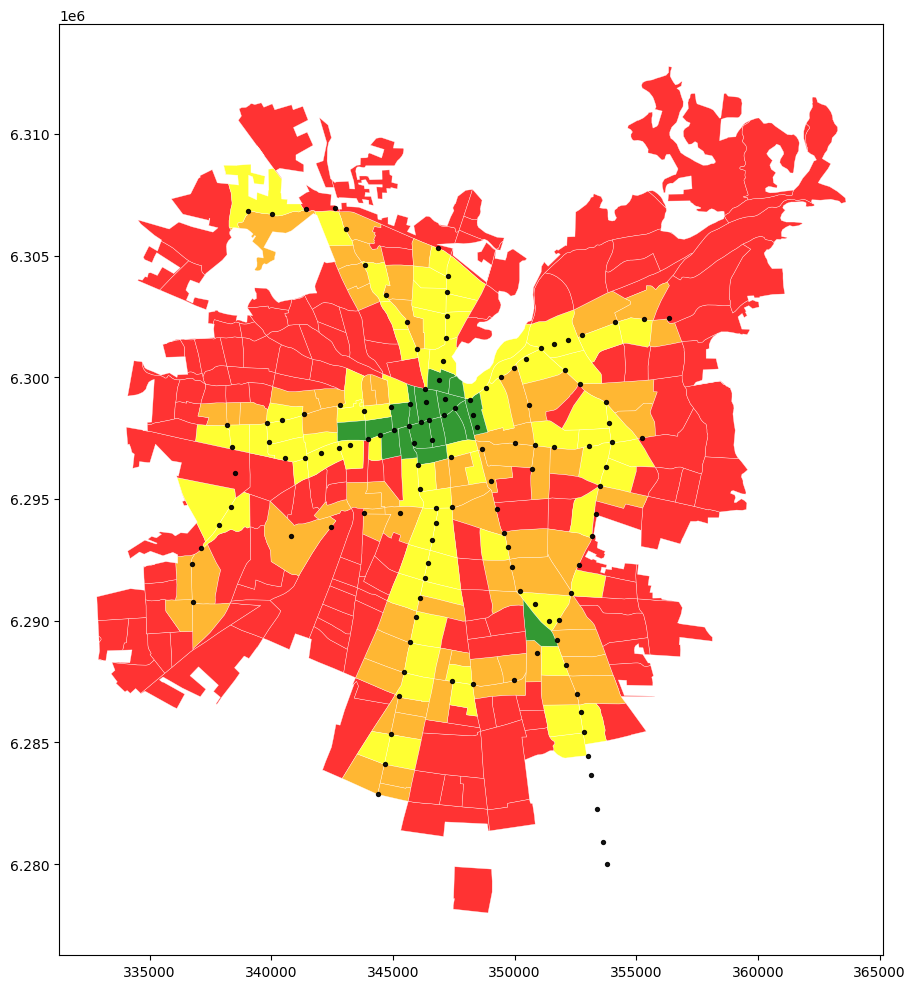

In [24]:

import matplotlib.pyplot as plt

fig, ax = plt.subplots( figsize=(20, 10))

distritos_con_centroide.plot(ax=ax, 
                            color=distritos_con_centroide['nivel_accesibilidad'].map(colores_accesibilidad),
                            linewidth=0.3, edgecolor='white', alpha=0.8)

# Agregamos las estaciones de metro
estaciones_metro.plot(ax=ax, color='black', markersize=8, alpha=0.9, marker='o')


plt.tight_layout()
plt.show()


In [25]:
# Contar para cada estación cuántos centroides de distrito están a menos de 1000 metros. 
distritos_centroides = distritos_con_centroide['centroide'] #Tomamos los centroides de los distritos. 
estaciones_metro['distritos_cercanos'] = 0 # Inicializamos la columna en 0
for i in range(len(estaciones_metro)):
    estacion = estaciones_metro.geometry.iloc[i]
    contador = 0
    for centroide in distritos_centroides:
        if estacion.distance(centroide) <= 1000:
            contador += 1 # A medida que encontramos un centroide cercano, aumentamos el contador
    estaciones_metro.at[i, 'distritos_cercanos'] = contador

# Filtramos ahora las estaciones con 3 o más distritos cercanos.
estaciones_metro_3_o_mas = estaciones_metro[estaciones_metro['distritos_cercanos'] >= 3]

estaciones_metro_3_o_mas.head(10)


,OBJECTID,ID_LINEA,LINEA,ESTACION,NOMBRE,POINT_X,POINT_Y,geometry,distritos_cercanos
0,2,2,L2,EL PARRON,El Parrón,345717.3664,6.289105e+06,POINT (345717.366 6289105.444),3
1,3,5,L5,CUMMING,Cumming,344899.1198,6.298782e+06,POINT (344899.120 6298781.571),6
2,4,5,L5,QUINTA NORMAL,Quinta Normal,343809.1081,6.298628e+06,POINT (343808.803 6298622.125),6
3,5,7,L4A,SAN RAMON,San Ramón,346685.4133,6.287624e+06,POINT (347436.975 6287501.270),5
4,6,7,L4A,SANTA ROSA,Santa Rosa,348282.5816,6.287378e+06,POINT (348282.582 6287378.409),3
6,8,7,L4A,SANTA JULIA,Santa Julia,350918.5606,6.288672e+06,POINT (350918.561 6288672.406),3
10,12,4,L4,LOS QUILLAYES,Los Quillayes,352843.9961,6.285423e+06,POINT (352843.996 6285422.683),3
13,16,4,COMB,VICUNA MACKENNA L4,Vicuña Mackenna,351821.6078,6.290015e+06,POINT (351821.608 6290015.043),3
18,21,4,L4,GRECIA,Grecia,353509.8606,6.295539e+06,POINT (353509.861 6295538.941),3
20,23,4,COMB,PLAZA EGANA,Plaza Egaña,354014.1618,6.297374e+06,POINT (354013.604 6297334.068),3


In [26]:
estaciones_metro_3_o_mas[['NOMBRE', 'distritos_cercanos']]

,NOMBRE,distritos_cercanos
0,El Parrón,3
1,Cumming,6
2,Quinta Normal,6
3,San Ramón,5
4,Santa Rosa,3
6,Santa Julia,3
10,Los Quillayes,3
13,Vicuña Mackenna,3
18,Grecia,3
20,Plaza Egaña,3


In [27]:
estaciones_metro_3_o_mas[['NOMBRE', 'distritos_cercanos']].sort_values(by='distritos_cercanos', ascending=False).head(10)

,NOMBRE,distritos_cercanos
2,Quinta Normal,6
1,Cumming,6
55,La Moneda,5
62,Universidad Católica,5
30,Patronato,5
60,Santa Lucía,5
47,Estación Central,5
3,San Ramón,5
106,Conchalí,4
59,Universidad de Chile,4


# Misión 3

In [28]:
# Cargamos las comunas
comunas = gpd.read_file('data/Comunas/comunas.shp')
comunas.head()

,objectid,shape_leng,dis_elec,cir_sena,cod_comuna,codregion,st_area_sh,st_length_,Region,Comuna,Provincia,geometry
0,48,170038.624165,16,8,6204,6,9.685774e+08,206184.271675,Región del Libertador Bernardo O'Higgins,Marchigüe,Cardenal Caro,"POLYGON ((-7992818.789 -4056669.319, -7992731...."
1,29,125730.104795,15,8,6102,6,4.157446e+08,151911.576827,Región del Libertador Bernardo O'Higgins,Codegua,Cachapoal,"POLYGON ((-7831651.813 -4022443.109, -7831596...."
2,30,63026.084422,15,8,6103,6,1.448565e+08,76355.326122,Región del Libertador Bernardo O'Higgins,Coinco,Cachapoal,"POLYGON ((-7892616.357 -4060673.364, -7892621...."
3,31,89840.903562,15,8,6104,6,3.256572e+08,108874.623150,Región del Libertador Bernardo O'Higgins,Coltauco,Cachapoal,"POLYGON ((-7906457.717 -4051723.734, -7906266...."
4,78,122626.493264,23,11,9121,9,6.990727e+08,156680.410681,Región de La Araucanía,Cholchol,Cautín,"POLYGON ((-8121756.186 -4645860.295, -8121644...."


In [29]:
estaciones_metro.head()

,OBJECTID,ID_LINEA,LINEA,ESTACION,NOMBRE,POINT_X,POINT_Y,geometry,distritos_cercanos
0,2,2,L2,EL PARRON,El Parrón,345717.3664,6.289105e+06,POINT (345717.366 6289105.444),3
1,3,5,L5,CUMMING,Cumming,344899.1198,6.298782e+06,POINT (344899.120 6298781.571),6
2,4,5,L5,QUINTA NORMAL,Quinta Normal,343809.1081,6.298628e+06,POINT (343808.803 6298622.125),6
3,5,7,L4A,SAN RAMON,San Ramón,346685.4133,6.287624e+06,POINT (347436.975 6287501.270),5
4,6,7,L4A,SANTA ROSA,Santa Rosa,348282.5816,6.287378e+06,POINT (348282.582 6287378.409),3


In [30]:
comunas.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [31]:
estaciones_metro.crs

<Projected CRS: EPSG:32719>
Name: WGS 84 / UTM zone 19S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 72°W and 66°W, southern hemisphere between 80°S and equator, onshore and offshore. Argentina. Bolivia. Brazil. Chile. Colombia. Peru.
- bounds: (-72.0, -80.0, -66.0, 0.0)
Coordinate Operation:
- name: UTM zone 19S
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Dado que en este archivo hemos trabajado con `EPSG:32719`, será el que volveremos a usar.

In [32]:
comunas.to_crs(epsg=32719, inplace=True)

In [33]:
comunas['cantidad_estaciones_metro'] = 0

for i in range(len(comunas)):
    comuna_geom = comunas.geometry.iloc[i]
    contador = 0
    
    for estacion_geom in estaciones_metro.geometry:
        if estacion_geom.within(comuna_geom):
            contador += 1
    comunas.at[i, 'cantidad_estaciones_metro'] = contador

comunas[['Comuna', 'cantidad_estaciones_metro']]

,Comuna,cantidad_estaciones_metro
0,Marchigüe,0
1,Codegua,0
2,Coinco,0
3,Coltauco,0
4,Cholchol,0
...,...,...
341,San Nicolás,0
342,San Fabián,0
343,Ñiquén,0
344,El Carmen,0


In [34]:
comunas[['Comuna', 'cantidad_estaciones_metro']].sort_values(by='cantidad_estaciones_metro', ascending=False).head(10)

,Comuna,cantidad_estaciones_metro
110,Santiago,20
82,Providencia,10
145,La Florida,9
172,Ñuñoa,8
190,Recoleta,7
156,Las Condes,7
140,Estación Central,6
36,San Miguel,5
119,Puente Alto,5
171,Maipú,5
